# CS114. Problem set 1

## Problem 1. License Plates (#probability)

> Argentinian license plates currently contain 7 characters: two letters, three numbers, and two more letters. There are 26 possible letters (A-Z) and 10 digits (0-9).

### 1. How many different license plate arrangements are there?

Let $L$ be the number of possible letters (26) and $D$ be the number of possible digits (10).  

The license plate format is L L D D D L L.

* For the first letter, there are $L$ choices.
* For the second letter, there are $L$ choices.
* For the first digit, there are $D$ choices.
* For the second digit, there are $D$ choices.
* For the third digit, there are $D$ choices.
* For the third letter, there are $L$ choices.
* For the fourth letter, there are $L$ choices.

> Examples: MF112KF / DL831DP / EC191GU /JW378RW / BA554CB

Since the choice of each character (letter or digit) is independent of the others, the selection of one character does not affect the probability of selecting any other character. Therefore, we multiply the number of choices for each position to find the total number of different arrangements.

$$
L \times L \times D \times D \times D \times L \times L 
$$

$$
L^4 \times D^3
$$

Substituting $L=26$ and $D=10$, we get total arrangements:

$$
26^4 \times 10^3 = 456,976,000
$$

Therefore, there are 456,976,000 different possible license plate arrangements.


In [ ]:
letters = 26
digits = 10

total_arrangements = (letters**4) * (digits**3)

print(
    f"\nTotal possible license plate arrangements (theoretical): {total_arrangements}"
)


Total possible license plate arrangements (theoretical): 456976000


### 2. What is the probability that a randomly chosen arrangement contains no repeated characters?

Let $L$ be the number of possible letters (26) and $D$ be the number of possible digits (10). The license plate format is L L D D D L L.

To have no repeated characters, we must choose each character without replacement.

* For the first letter, there are $L$ choices.
* For the second letter, there are $L-1$ choices.
* For the first digit, there are $D$ choices.
* For the second digit, there are $D-1$ choices.
* For the third digit, there are $D-2$ choices.
* For the third letter, there are $L-2$ choices.
* For the fourth letter, there are $L-3$ choices.


The number of arrangements with no repeated characters is:  


$L \times (L-1) \times D \times (D-1) \times (D-2) \times (L-2) \times (L-3)$

$= 26 \times 25 \times 10 \times 9 \times 8 \times 24 \times 23$ 

$= 258,336,000$.

The total number of possible arrangements (calculated in the previous part) is $L^4 \times D^3 = 26^4 \times 10^3 = 456,976,000$.

The probability of a randomly chosen arrangement having no repeated characters is the number of arrangements with no repetitions divided by the total number of possible arrangements:

$$
P(\text{no repetitions}) = \frac{26 \times 25 \times 10 \times 9 \times 8 \times 24 \times 23}{26^4 \times 10^3} = \frac{258,336,000}{456,976,000} \approx 0.565 \text{ or } 56.5\%
$$

In [ ]:
letters = 26
digits = 10

no_repetitions_arrangements = (
    letters
    * (letters - 1)
    * digits
    * (digits - 1)
    * (digits - 2)
    * (letters - 2)
    * (letters - 3)
)


probability_no_repetitions = (
    no_repetitions_arrangements / total_arrangements
)

print(f"Probability of no repeated characters: {probability_no_repetitions}")

Probability of no repeated characters: 0.5653163404642695


### 3. What is the probability that a randomly chosen arrangement is a palindrome?

A palindrome is a sequence that reads the same forwards and backward.  For a 7-character license plate (L L D D D L L) to be a palindrome, the following conditions must hold:

* The first letter must be the same as the last letter.
* The second letter must be the same as the second-to-last letter.
* The first digit must be the same as the third digit.  The middle digit can be any digit.

The arrangement must be of the form  L<sub>1</sub> L<sub>2</sub> D<sub>1</sub> D<sub>2</sub> D<sub>1</sub> L<sub>2</sub> L<sub>1</sub>. More clarifications:

* **Letters:**
    * The first letter (L<sub>1</sub>) can be any of the $L$ choices. This also determines the last letter. 
      * For example, if L<sub>1</sub> is 'A', then the last letter must also be 'A'.
    * The second letter (L<sub>2</sub>) can be any of the $L$ choices. This determines the second-to-last letter.
      * For example, if L<sub>2</sub> is 'B', then the second-to-last letter must also be 'B'.
* **Digits:**
    * The first digit (D<sub>1</sub>) can be any of the $D$ choices. This also determines the third digit.
      * For example, if D<sub>1</sub> is '1', then the third digit must also be '1'.
    * The middle digit (D<sub>2</sub>) is free to be any digit because it is in the center and doesn't need to mirror anything—it's the same from both directions.
      * For example, D<sub>2</sub> can be any digit from '0' to '9'.

So, a palindromic license plate could look like: 
$$
A B 1 2 1 B A
$$


The number of palindromic arrangements is:

$L \times L \times D \times D = L^2 \times D^2 = 26^2 \times 10^2 = 67,600$

The total number of arrangements is $L^4 \times D^3 = 26^4 \times 10^3 = 456,976,000$.

The probability of a palindromic arrangement is:

$P(\text{palindrome}) = \frac{\text{Number of palindromic arrangements}}{\text{Total number of arrangements}} = \frac{67,600}{456,976,000} \approx 0.000148 \text{ or } 0.0148\%$

In [ ]:
# Problem 1: License Plates - Python Simulation (Probability of a palindrome)

letters = 26
digits = 10

total_arrangements = (letters**4) * (digits**3)
palindrome_arrangements = (letters**2) * (digits**2)

probability_palindrome = palindrome_arrangements / total_arrangements

print(f"Probability of a palindrome: {probability_palindrome}")

Probability of a palindrome: 0.00014792899408284024


### 4. Write a simulation to verify your results to problems 1.2 and 1.3.

In the spirit of #CS110_AlgoStratDataStruct, I will take my time to explain what my code is, how it works, and **why** it works.

The goal is to verify the theoretical probabilities calculated in parts 2 and 3 using a Monte Carlo simulation. A Monte Carlo simulation involves generating a large number of random samples and observing the frequency of specific events within those samples.

##### **Function:** `generate_license_plate(letters, digits)`

This function simulates the creation of a random Argentinian license plate. It provides a way to generate random license plates, essential for running the simulation.

**How it works:** It creates a list of characters by randomly choosing two letters, three digits, and then two more letters, concatenating them into a single string representing the license plate.

In [ ]:
import random

list_alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
list_digits = "0123456789"


def generate_license_plate(letters=26, digits=10):
    """Generates a random license plate."""
    chars = []
    chars.extend(random.choices(list_alphabet, k=2))
    chars.extend(random.choices(list_digits, k=3))
    chars.extend(random.choices(list_alphabet, k=2))
    return "".join(chars)


# Example usage
print(generate_license_plate())
# Example output: 'AB123CD'

YQ070XU


##### **Function:** `is_palindrome(plate)`

This function checks if a given license plate string is a palindrome. It determines whether a generated license plate satisfies the palindrome condition for the simulation.

**How it works:** It compares the license plate string to its reverse. If they are identical, the function returns True; otherwise, it returns False.

In [ ]:
def is_palindrome(plate):
    """Checks if a license plate is a palindrome."""
    return plate == plate[::-1]


# Example Usage
print(is_palindrome("AB121BA"))  # True
print(is_palindrome("AB123CD"))  # False

True
False


##### **Function:** `has_no_repetitions(plate)`

This function checks if a given license plate contains no repeated characters. It determines whether a generated license plate meets the no-repetition criterion for the simulation.

**How it works:** It uses the `set()` function to create a collection of unique characters in the plate. If the length of the set is equal to the length of the original plate string, it means there are no repetitions, and the function returns `True`; otherwise, it returns `False`.

In [ ]:
def has_no_repetitions(plate):
    """Checks if a license plate has no repeated characters."""
    return len(set(plate)) == len(plate)


# Example Usage
print(has_no_repetitions("AB123CD"))  # True
print(has_no_repetitions("AA123CD"))  # False

True
False


##### **Function:** `run_simulation(num_trials)`

This function executes the Monte Carlo simulation. It is the core of the simulation process and estimates probabilities based on a large number of trials.

**How it works:**

- It initializes counters for palindromes and non-repeating plates.
- It loops `num_trials` times, generating a license plate in each iteration.
- Within the loop, it checks if the generated plate is a palindrome and if it has no repeated characters, incrementing the respective counters.
- Finally, it calculates the estimated probabilities by dividing the counts by the total number of trials.

In [ ]:
def run_simulation(num_trials):
    """Runs a Monte Carlo simulation to estimate probabilities."""
    letters = 26
    digits = 10

    palindrome_count = 0
    no_repetitions_count = 0

    for _ in range(num_trials):
        plate = generate_license_plate(letters, digits)
        if is_palindrome(plate):
            palindrome_count += 1
        if has_no_repetitions(plate):
            no_repetitions_count += 1

    simulated_prob_palindrome = palindrome_count / num_trials
    simulated_prob_no_repetitions = no_repetitions_count / num_trials

    return simulated_prob_palindrome, simulated_prob_no_repetitions


# running the simulation
num_trials = 10_000_000
simulated_prob_palindrome, simulated_prob_no_repetitions = run_simulation(num_trials)

print(f"Simulation Results ({num_trials} trials):")
print(f"  Probability of no repeated characters: {simulated_prob_no_repetitions}")
print(f"  Probability of a palindrome: {simulated_prob_palindrome}")

print(f"Theoretical Results:")
print(f"  Probability of no repeated characters: {probability_no_repetitions}")
print(f"  Probability of a palindrome: {probability_palindrome}")

Simulation Results (10000000 trials):
  Probability of no repeated characters: 0.5656028
  Probability of a palindrome: 0.0001482
Theoretical Results:
  Probability of no repeated characters: 0.5653163404642695
  Probability of a palindrome: 0.00014792899408284024


## Problem 2. Distinguished shoes (#probability)

$N$ guests with the same shoe size are putting on shoes in the dark as they leave the apartment. Each of them can distinguish a right shoe from a left shoe, but they cannot distinguish their own shoes from those of others. Find the probabilities of the following events:

### **Event A:** All guests put on their own shoes.

Let $N$ be the number of guests. Since each guest has a left and a right shoe, there are $2N$ shoes in total. Each guest must choose one left shoe and one right shoe. We assume that each guest picks one left and one right shoe randomly.

Let's consider the total number of ways the $N$ guests can pick up the $2N$ shoes, such that every guest has a left shoe and a right shoe. The number of ways to select the left shoes is $N!$. The number of ways to select the right shoes is $N!$. 

Therefore, the total number of ways to select the pairs of shoes is given by the product of these two: 

$$
(N!) * (N!) = (N!)^2
$$

Out of all possible arrangements, there's only one correct arrangement where every guest wears their own pair of shoes (both left and right shoes matching). This is because each guest needs to pick their specific left shoe, and their specific right shoe. Any other choice would lead to at least one guest not wearing their own pair.

Therefore, the probability of event A (all guests put on their own shoes) is:

$$
P(A) = \frac{1}{(N!)^2}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def simulate_shoe_problem(n, num_trials=1_000_000):
    """Simulates the shoe problem for N guests over a specified number of trials."""
    successes = 0
    for _ in range(num_trials):
        # Create a list of left and right shoes
        # Represented by the indexes of the shoes
        left_shoes = np.arange(n)
        right_shoes = np.arange(n)
        # Shuffle the shoes
        # This represents the random assignment of shoes to guests
        np.random.shuffle(left_shoes)
        np.random.shuffle(right_shoes)

        # Check if all guests have their own shoes
        # This condition is met if and ONLY IF guest `i` gets their own left shoe (index `i`)
        # and their own right shoe (index `i`) for every guest `i`
        # all() returns True if all elements in the iterable are True
        if all(left_shoes[i] == right_shoes[i] == i for i in range(n)):
            successes += 1

    # Return the probability of success
    return successes / num_trials

In [ ]:
# Data collection
n_values = range(1, 6)  # Test for N = 1 to 5
probabilities_simulated = []
probabilities_analytical = []

for n in n_values:
    simulated_prob = simulate_shoe_problem(n)
    analytical_prob = 1 / (np.math.factorial(n) ** 2)

    probabilities_simulated.append(simulated_prob)
    probabilities_analytical.append(analytical_prob)

# Create a DataFrame for easier viz
data = {
    "N": list(n_values),
    "Simulated Probability": probabilities_simulated,
    "Analytical Probability": probabilities_analytical,
}
df = pd.DataFrame(data)

# Display the DataFrame
print("\n")
print(df)

/var/folders/5c/74zjnt5j7tz5srqtplhlybsh0000gn/T/ipykernel_3320/3080354942.py:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  analytical_prob = 1 / (np.math.factorial(n) ** 2)




   N  Simulated Probability  Analytical Probability
0  1               1.000000                1.000000
1  2               0.249913                0.250000
2  3               0.027734                0.027778
3  4               0.001736                0.001736
4  5               0.000065                0.000069


### **Event B:** All guests put on shoes from the same pair (which may not be their own).

Again, let $N$ be the number of guests. There are $2N$ shoes in total (N left shoes and N right shoes).

Total number of ways to choose left shoes: $N!$ (N choices for the first guest, N-1 for the second, ..., 1 for the last)

Total number of ways to choose right shoes: $N!$

The total number of possible shoe arrangements is $(N!)^2$, as each guest selects one left shoe and one right shoe independently.

All guests wear shoes from the same pair. This means if guest 1 picks a left shoe belonging to guest 'X', then they must also pick the right shoe belonging to guest 'X'. The second guest then picks a pair belonging to another guest 'Y' (different from X), and so on.

The first guest can choose any of the $N$ left shoes. Having chosen a left shoe, the first guest then must choose the matching right shoe (only 1 choice). The second guest can now choose any of the remaining $N-1$ left shoes. Then they too must take the matching right shoe (only 1 option). This continues until the last guest.

So, the number of ways all guests put on shoes from the same pair is $N!$ (the number of ways to assign the pairs to guests).

Therefore, the probability of event B is:

 $$
 P(B) = \frac{N!}{(N!)^2} = \frac{1}{N!} 
 $$

In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt


def simulate_shoe_problem_b(n, num_trials=1_000_000):
    """Simulates event B for the shoe problem."""
    successes = 0
    for _ in range(num_trials):
        left_shoes = np.arange(n)
        right_shoes = np.arange(n)
        np.random.shuffle(left_shoes)
        np.random.shuffle(right_shoes)

        # The difference between event A and event B is that
        # event B does not check if the left and right shoes are the same with index i
        # no extra "== i"
        if all(left_shoes[i] == right_shoes[i] for i in range(n)):
            successes += 1

    return successes / num_trials

In [ ]:
# Example usage (copy-pasted from the previous cell)
n_values = range(1, 6)
simulated_probs = []
analytical_probs = []

for n in n_values:
    simulated_prob = simulate_shoe_problem_b(n)
    analytical_prob = 1 / math.factorial(n)
    simulated_probs.append(simulated_prob)
    analytical_probs.append(analytical_prob)

# Create a DataFrame
data = {
    "N": list(n_values),
    "Simulated Probability (B)": simulated_probs,
    "Analytical Probability (B)": analytical_probs,
}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   N  Simulated Probability (B)  Analytical Probability (B)
0  1                   1.000000                    1.000000
1  2                   0.499888                    0.500000
2  3                   0.166168                    0.166667
3  4                   0.041974                    0.041667
4  5                   0.008390                    0.008333


## Problem 3. Defectives (#distributions)

Consider a box containing 3 defective parts and 5 working parts. Parts are drawn from the box one by one without replacement until the first good part is found. Let $X$ be the random variable representing the number of extractions required to find the first good part.

### 1. Determine the cumulative distribution function (CDF) for the random variable $X$.

To find the CDF, $F_X(x)$, I need to calculate $P(X \le x)$ for all possible values of $x$. First, I recognize that $X$ can take on values (supports) from 1 to 4. 

> It's impossible to draw more than 4 parts without finding a working one, since there are only 3 defectives.

Let $D$ represent drawing a defective part and $W$ represent drawing a working part.

- Case $x < 1$: It's impossible to find a working part in less than one draw, so 

$$
F_X(x) = P(X \le x) = 0 \quad \text{for} \quad x < 1
$$

- Case $1 \le x < 2$: This corresponds to finding the first working part on the first draw. There are 5 working parts out of 8 total, so:

$$
F_X(x) = P(X \le 1) = P(X=1) = \frac{5}{8} \text{ or } 62.5\%
$$

- Case $2 \le x < 3$: This means finding the first working part within the first two draws. This can happen in two ways: finding it on the first draw (which we already calculated) or finding a defective part first and then a working part. Thinking through this:

$$
F_X(x) = P(X \le 2) = P(X=1) + P(X=2) = \frac{5}{8} + P(D_1 \cap W_2) 
$$

$$
= \frac{5}{8} + \frac{3}{8} \cdot \frac{5}{7} = \frac{5}{8} + \frac{15}{56} = \frac{35+15}{56} = \frac{50}{56} = \frac{25}{28} \text{ or } 89.29\%
$$

- Case $3 \le x < 4$: This means finding the first working part within the first three draws. Initially, I tried adding probabilities like the previous case, but realized I could approach it more efficiently by considering the complement. The only way not to find a working part in three draws is to draw all three defective parts. So:

$$
P(X > 3) = P(D_1 \cap D_2 \cap D_3) = \frac{3}{8} \cdot \frac{2}{7} \cdot \frac{1}{6} = \frac{1}{56}
$$

Therefore, 

$$
F_X(x) = P(X \le 3) = 1 - P(X > 3) = 1 - \frac{1}{56} = \frac{55}{56} \text{ or } 98.21\%
$$

- Case $x \ge 4$: It's certain we'll find a working part by the fourth draw at the latest, so 

$$
F_X(x) = P(X \le 4) = 1 \text{ or } 100\%
$$


Putting this all together, the CDF is:

$$
F_X(x) = \begin{cases}
0, & x < 1 \\
\frac{5}{8} \text{ or } 62.5\%, & 1 \le x < 2 \\
\frac{25}{28} \text{ or } 89.29\%, & 2 \le x < 3 \\
\frac{55}{56} \text{ or } 98.21\%, & 3 \le x < 4 \\
1 \text{ or } 100\%, & x \ge 4
\end{cases}
$$

### 2. Plot the graph of the cumulative distribution function (CDF) for the random variable $X$.

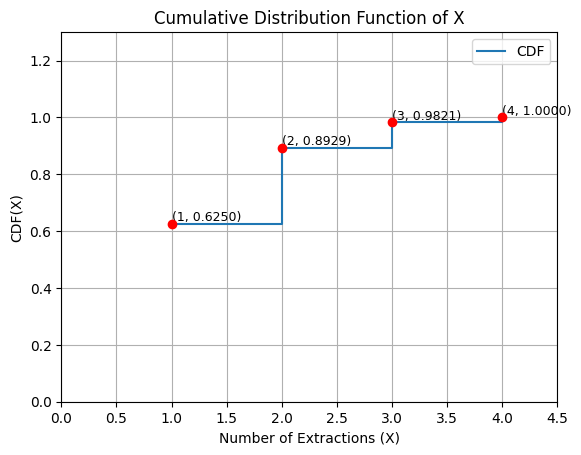

In [ ]:
import matplotlib.pyplot as plt

# x-values where the CDF changes (jumps)
x_values = [1, 2, 3, 4]

# corresponding CDF values at these x-values
cdf_values = [5 / 8, 25 / 28, 55 / 56, 1]

# create the step plot
plt.step(
    x_values, cdf_values, where="post", label="CDF"
)  # 'post' ensures the steps are correctly aligned

# add specific values and dots to represent the CDF
# Carl's note: Feels like CSS in Web Design. I enjoy this.
plt.scatter(x_values, cdf_values, color="red", zorder=5)
for x, y in zip(x_values, cdf_values):
    plt.text(x, y, f"({x}, {y:.4f})", fontsize=9, verticalalignment="bottom")

# labels and title
plt.xlabel("Number of Extractions (X)")
plt.ylabel("CDF(X)")
plt.title("Cumulative Distribution Function of X")

# grid for better readability
plt.grid(True)

# show plot with legend
plt.legend()

# adjust x y axis
plt.xlim(0, 4.5)
plt.ylim(0, 1.3)
plt.show()

The "step" nature of the graph reflects the discrete nature of the random variable $X$. The probability jumps at each integer value of $x$ and remains constant until the next integer. The open circles at the beginning of each step indicate that the CDF takes the value at the top of the "step." 

### 3. There are 5 cars that require a working part to be fixed. We randomly choose one part from the box and place it in the car, without replacement. If the part is a working part, then the car is fixed. Let Y be the random variable representing the number of fixed cars. What is the probability mass function (PMF) for $Y$.

$Y$ represents the number of cars fixed, which depends on the number of working parts drawn from the box. Since there are only 5 working parts in the box, $Y$ can take on values from 0 to 5.  We need to find $P(Y=y)$ for each of these values.

* **$P(Y=0)$:** This means no working parts were drawn in the five draws. This is only possible if all five draws are defective parts, which is impossible since there are only 3 defective parts. Thus,
    $$ P(Y=0) = 0 $$

* **$P(Y=1)$:** This means exactly one working part was drawn. This occurs if we draw one working part and four defective parts. However, since there are only 3 defective parts, this is also impossible. Thus,
    $$ P(Y=1) = 0 $$

* **$P(Y=2)$:** This means exactly two working parts were drawn. We need to consider the combinations of drawing 2 working parts (W) and 3 defective parts (D):
    $$ P(Y=2) = \frac{\binom{5}{2}\binom{3}{3}}{\binom{8}{5}} = \frac{10 \cdot 1}{56} = \frac{10}{56} = \frac{5}{28} $$

* **$P(Y=3)$:** This means exactly three working parts were drawn and thus, two defective parts:
    $$ P(Y=3) = \frac{\binom{5}{3}\binom{3}{2}}{\binom{8}{5}} = \frac{10 \cdot 3}{56} = \frac{30}{56} = \frac{15}{28} $$

* **$P(Y=4)$:** This means exactly four working parts were drawn and one defective part.
   $$ P(Y=4) = \frac{\binom{5}{4}\binom{3}{1}}{\binom{8}{5}} = \frac{5 \cdot 3}{56} = \frac{15}{56} $$

* **$P(Y=5)$:** This means all five working parts were drawn, which is possible if we draw all 5 working parts before any of the defective ones.
    $$ P(Y=5) = \frac{\binom{5}{5}\binom{3}{0}}{\binom{8}{5}} = \frac{1 \cdot 1}{56} = \frac{1}{56} $$


$Y$ represents the number of cars fixed, which depends on the number of working parts drawn from the box. Since there are only 5 working parts in the box, $Y$ can take on values from 0 to 5. We need to find $P(Y=y)$ for each of these values.

This scenario represents a **hypergeometric distribution**. The hypergeometric distribution models the probability of drawing a specific number of successes (working parts) in a fixed number of draws from a finite population without replacement.

The general formula for the hypergeometric distribution is:

$$
P(Y = k) = \frac{\binom{K}{k} \binom{N-K}{n-k}}{\binom{N}{n}}
$$

where:
- $N$ is the population size,
- $K$ is the number of successes in the population,
- $n$ is the number of draws,
- $k$ is the number of observed successes.

For this problem:
- $N = 8$ (total parts),
- $K = 5$ (working parts),
- $n = 5$ (number of draws),
- $k$ can take values from 0 to 5 (number of working parts drawn).

### Calculating $P(Y = y)$ for Each Value of $y$

* **$P(Y=0)$:** No working parts drawn (impossible):

$$
P(Y = 0) = \frac{\binom{5}{0} \binom{3}{5}}{\binom{8}{5}} = 0
$$

* **$P(Y=1)$:** One working part drawn (impossible):

$$
P(Y = 1) = \frac{\binom{5}{1} \binom{3}{4}}{\binom{8}{5}} = 0
$$

* **$P(Y=2)$:** Two working parts drawn:

$$
P(Y = 2) = \frac{\binom{5}{2} \binom{3}{3}}{\binom{8}{5}} = \frac{10 \cdot 1}{56} = \frac{5}{28} \text{ or } 17.86\%
$$

* **$P(Y=3)$:** Three working parts drawn:

$$
P(Y = 3) = \frac{\binom{5}{3} \binom{3}{2}}{\binom{8}{5}} = \frac{10 \cdot 3}{56} = \frac{15}{28} \text{ or } 53.57\%
$$

* **$P(Y=4)$:** Four working parts drawn:

$$
P(Y = 4) = \frac{\binom{5}{4} \binom{3}{1}}{\binom{8}{5}} = \frac{5 \cdot 3}{56} = \frac{15}{56} \text{ or } 26.79\%
$$

* **$P(Y=5)$:** All five working parts drawn:

$$
P(Y = 5) = \frac{\binom{5}{5} \binom{3}{0}}{\binom{8}{5}} = \frac{1 \cdot 1}{56} = \frac{1}{56} \text{ or } 1.79\%
$$


Therefore, the PMF of $Y$ is:

$$
P(Y=y) = \begin{cases}
    0, & y=0, 1 \\
    \frac{10}{56} = \frac{5}{28}, & y=2 \\
    \frac{30}{56} = \frac{15}{28}, & y=3 \\
    \frac{15}{56}, & y=4 \\
    \frac{1}{56}, & y=5 \\
\end{cases}
$$

**Verification:**  As a check, the probabilities should sum to 1:

$$ \frac{10}{56} + \frac{30}{56} + \frac{15}{56} + \frac{1}{56} = \frac{10 + 30 + 15 + 1}{56} = \frac{56}{56} = 1 $$

This confirms the PMF is correct.


### 4. Write a simulation to verify your PMF from part 3.3.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# defective and working parts
num_defective = 3
num_working = 5
total_parts = num_defective + num_working

num_trials = 1_000_000

# array to store the results of each trial
fixed_cars = [0] * num_trials

# simulation
for i in range(num_trials):
    # Create a representation of the box with parts (0 for defective, 1 for working)
    box = np.array([0] * num_defective + [1] * num_working)

    # shuffle the box randomly
    np.random.shuffle(box)

    # draw 5 parts w/out replacement
    draw = box[
        :5
    ]  # taking the first 5 after shuffling simulates drawing without replacement

    # count the number of working parts drawn (fixed cars)
    fixed_cars[i] = np.sum(draw)

# calculate PMF from simulation
# unique() returns the unique values in the array
unique_vals, counts = np.unique(fixed_cars, return_counts=True)
empirical_pmf = counts / num_trials

# theoretical PMF from previous calculation
theoretical_pmf = np.array([0, 0, 5 / 28, 15 / 28, 15 / 56, 1 / 56])

# dataframe for pandas for easier viz
data = {
    "Y": range(6),
    "Theoretical PMF": theoretical_pmf,
    "Empirical PMF": [0, 0] + empirical_pmf.tolist(),
    # used to ensure the list matches the length of theoretical PMF
}

df = pd.DataFrame(data)
print(df)

   Y  Theoretical PMF  Empirical PMF
0  0         0.000000       0.000000
1  1         0.000000       0.000000
2  2         0.178571       0.179068
3  3         0.535714       0.534887
4  4         0.267857       0.267864
5  5         0.017857       0.018181



# AI Statement
I used [Text2Latex](https://www.text2latex.com) instead of an LLM to help me so I can write latex without getting "hints". Other than that, no AI tools were used. 


# References
I adapted the Monte Carlo simulation approach from "Simulated Birthdays" (CS114. Lesson 4. Combinatorics 1.) to estimate the probabilities of no repetitions and palindromes.

The "Dumplings" problem  provided the conceptual framework and calculation strategy for determining the probabilities of both Event A (everyone getting their own shoes) and Event B (everyone getting matching shoes). Especially in the idea of utilizing complementary events (shifting perspectives) and the inclusion-exclusion principle.

The "Python guide" for plotting the Binomial CDF (CS114. Lesson 9. Discrete Random Variables 2.) illustrated general CDF plotting techniques, which I referred to create the CDF plot for this specific problem.

The "Eggs" exercise and the "Hypergeometric distribution" section (CS114. Lesson 8. Discrete Random Variables 1.) was referred for further understanding and applying the Hypergeometric distribution to derive the PMF, as both scenarios involved similar sampling without replacement in code.